In [5]:
import numpy       as np
import pandas      as pd
import seaborn     as sns
import scipy.stats as stats
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

### Take Home Exercises

**1)  Is there any evidence that the stock return depends on sector like industrial or consumer or service?**


**The following table shows the annual return of stocks under different sectors:**

In [2]:
y_stock_consumer = [ 0.0632, 0.1473, 0.1195, 0.1236, 0.1028, 0.0381, 0.1015, 0.1106, 0.0629, 0.0515, 0.0844, 0.1428, 0.0889, 0.0598,\
                    0.0696, 0.1162, 0.0522, 0.0534, 0.0593, 0.0710, 0.1091, 0.0820, 0.1019, 0.0904, 0.0861, 0.0939, 0.0263, \
                    0.0277, 0.0476, 0.0960]

X1                = np.array(y_stock_consumer)
print('Count, Mean and standard deviation of monthly income of members of Consumer Grp: %3d, %3.6f and %3.6f' % (len(X1), X1.mean(),np.var(X1,ddof =1)))

y_stock_service =  [ 0.1370, 0.0358, 0.0136, 0.1741, 0.1001, 0.1088, 0.1563, -0.0004, 0.1032, 0.0740, 0.1148, 0.0971, 0.1119, 0.0821,\
                    0.0164, 0.0145, 0.1012, 0.1385, -0.1027, 0.0526, 0.1205, 0.0447, 0.0871, 0.0559, 0.1002, 0.0765, 0.1003, 0.0787, 0.0659, 0.1360]

X2                = np.array(y_stock_service)
print('Count, Mean and standard deviation of monthly income of members of Service Grp: %3d, %3.6f and %3.6f' % (len(X2), X2.mean(),np.var(X2,ddof =1)))

y_stock_indistrial = [ 0.0674, 0.0711, 0.0569, 0.0248, 0.0542, 0.0800, 0.0255, 0.0834, 0.0499, 0.0339, 0.0873, 0.1385, 0.0529, 0.0906, 0.0284,\
                       0.0582, 0.0766, 0.0412, 0.0910, 0.0876, 0.1077, 0.0148, 0.0471, 0.1066, 0.0044, 0.0294, 0.0655, 0.0284, 0.0390, 0.0728]

X3                = np.array(y_stock_indistrial)
print('Count, Mean and standard deviation of monthly income of members of Industrial Grp: %3d, %3.6f and %3.6f' % (len(X3), X3.mean(),np.var(X3,ddof =1)))


Count, Mean and standard deviation of monthly income of members of Consumer Grp:  30, 0.082653 and 0.001010
Count, Mean and standard deviation of monthly income of members of Service Grp:  30, 0.079823 and 0.003073
Count, Mean and standard deviation of monthly income of members of Industrial Grp:  30, 0.060503 and 0.000963


In [3]:
import pandas as pd
import numpy  as np

df1     = pd.DataFrame({'Sector': 'Consumer',   'Stock_Return': y_stock_consumer})
df2     = pd.DataFrame({'Sector': 'Service',    'Stock_Return': y_stock_service})
df3     = pd.DataFrame({'Sector': 'Industrial', 'Stock_Return': y_stock_indistrial})

y_stock_df  = pd.DataFrame()

y_stock_df  = y_stock_df.append(df1) 
y_stock_df  = y_stock_df.append(df2) 
y_stock_df  = y_stock_df.append(df3) 


pd.DataFrame(y_stock_df.head())

,Sector,Stock_Return
0,Consumer,0.0632
1,Consumer,0.1473
2,Consumer,0.1195
3,Consumer,0.1236
4,Consumer,0.1028


#### Hint: Try One-way ANOVA

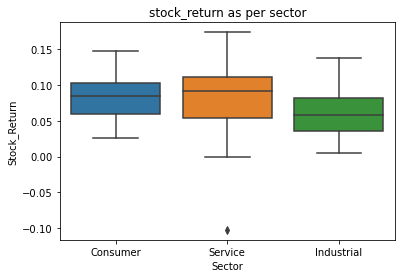

In [6]:
sns.boxplot(x = "Sector", y = "Stock_Return", data = y_stock_df)
plt.title('stock_return as per sector')
plt.show()

In [7]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 87)
print('F critical value for 2 and 87 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 87 df with .95 confidence 3.10


In [8]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Stock_Return ~ Sector', data = y_stock_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df        F    PR(>F)
Sector    0.008719   2.0  2.59173  0.080664
Residual  0.146340  87.0      NaN       NaN


n this example, calculated value of F ( = 2.5917) is less than Critical value of F( = 3.10)

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence to reject the null hypothesis
### that at least one mean stock_returns of a sectors is different from others .

**2 The following table shows the quantity of soaps at different discount of different brands collected over 20 days.**

In [9]:
table1  = [['Loc','Brand X','Brand Y','Brand Z'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1.head())

   Loc  Brand X  Brand Y  Brand Z
0    1       20       28       32
1    2       20       19       20
2    1       16       23       29
3    2       21       27       31
4    1       24       25       28


This is a two-way ANOVA with replication since the data contains values for multiple locations.

###Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of Brands and location on sales.

In [10]:
d0_val  = df1['Brand X'].values
d10_val = df1['Brand Y'].values
d20_val = df1['Brand Z'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Brand':'X','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Brand':'Y','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Brand':'Z','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Brand,Qty
0,1,X,20
1,2,X,20
2,1,X,16
3,2,X,21
4,1,X,24
...,...,...,...
35,2,Z,32
36,1,Z,30
37,2,Z,29
38,1,Z,26


In [11]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Qty ~ C(Brand) + C(Loc) + C(Brand):C(Loc)'
model = ols(formula, Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                      sum_sq     df          F        PR(>F)
C(Brand)         1240.316667    2.0  39.279968  1.055160e-13
C(Loc)              7.008333    1.0   0.443898  5.065930e-01
C(Brand):C(Loc)    84.816667    2.0   2.686085  7.246036e-02
Residual         1799.850000  114.0        NaN           NaN


In this example, 
* p value for discount  is 1.05e-13 and < 0.05 so we reject the null hypothesis (1) and conclude that the brand is having an effect on sales quantity.
* p value for location  is 5.5066 and > 0.05 so we retain the null hypothesis (2) and conclude that the location is not having an effect on sales quantity.
* p value for interaction (discount:location)  is 7.25 and > 0.05 so we retain the null hypothesis (3) and conclude that the interaction (BRAND:location) is not having an effect on sales quantity.

###**3 Blood group of patients of the hospital is given below:**
Expected percentage

| Blood group | Count |
| ------ | --- |
| O | 44%|
| A | 45% |
| B | 8% |
| AB | 3% |


Observed frequency

| Blood group | Count |
| ----- | ----|
| O | 67 |
| A | 83 |
| B | 29 |
| C | 8 |

At 5% level of significance do you have evidence to conclude that there are differences in the distribution of blood groups among patients that is expected as per our prior knowledge.



In [12]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([67, 83, 29, 8])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.44, n*.45, n*0.08, n*0.03])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0006908


<ipython-input-12-dfbc0bad15a6>:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  observed_values    = scipy.array([67, 83, 29, 8])
<ipython-input-12-dfbc0bad15a6>:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  expected_values    = scipy.array([n*0.44, n*.45, n*0.08, n*0.03])


**4. The shift quality data is given below:**

| Shift | Perfect | Satisfactory | Defective |
| ---- | ----- | ----- | ----- |
| I | 106 | 124 | 1 | 
|II |  67 | 85 | 1 |
| III | 37 | 72 | 3 |

At 5% level of significance do you have evidence to conclude that there are differences in quality among the three shifts?


In [13]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[106, 124, 1],[67, 85, 1],[37, 72, 3]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 8.64670 P value 0.070563 Degrees of freedom 4


### In this example, p value is 0.07 and > 0.05 so we wont reject the null hypothesis. 
### So, we conclude that conclude that there is no differences in quality among the three shifts.

## E N D  